# Данные

In [156]:
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go


corp_col = '#40ba21'

df = pd.read_csv("Never Trust Summary Statistics.tsv", delimiter="\t")
df

,dataset,x,y
0,dino,55.384600,97.179500
1,dino,51.538500,96.025600
2,dino,46.153800,94.487200
3,dino,42.820500,91.410300
4,dino,40.769200,88.333300
...,...,...,...
1841,wide_lines,33.674442,26.090490
1842,wide_lines,75.627255,37.128752
1843,wide_lines,40.610125,89.136240
1844,wide_lines,39.114366,96.481751


# Домашнее задание 4

## Добавление бинарной переменной

### Вариант 1 

In [157]:
df["binary"] = 0
df.loc[ df["x"] >= 50, "binary"] = 1
df

,dataset,x,y,binary
0,dino,55.384600,97.179500,1
1,dino,51.538500,96.025600,1
2,dino,46.153800,94.487200,0
3,dino,42.820500,91.410300,0
4,dino,40.769200,88.333300,0
...,...,...,...,...
1841,wide_lines,33.674442,26.090490,0
1842,wide_lines,75.627255,37.128752,1
1843,wide_lines,40.610125,89.136240,0
1844,wide_lines,39.114366,96.481751,0


### Вариант 2

Более логично прогнозировать не координату, а принадлежность к подклассу (dino и т.д.). Поэтому постараемся спронозировать принадлежность к классу вертикальных линий (v_lines).

In [158]:
df["binary"] = 0
df.loc[ df["dataset"] == "v_lines", "binary"] = 1
df

,dataset,x,y,binary
0,dino,55.384600,97.179500,0
1,dino,51.538500,96.025600,0
2,dino,46.153800,94.487200,0
3,dino,42.820500,91.410300,0
4,dino,40.769200,88.333300,0
...,...,...,...,...
1841,wide_lines,33.674442,26.090490,0
1842,wide_lines,75.627255,37.128752,0
1843,wide_lines,40.610125,89.136240,0
1844,wide_lines,39.114366,96.481751,0


## Обучающая и тестовая выборки

In [159]:
from sklearn.model_selection import train_test_split

X = df.drop(['binary', 'dataset'], axis=1) # X — признаки (features)
y = df[['binary']]              # y — целевая переменная (label)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Стандартизация объясняющих переменных

In [160]:
from sklearn.preprocessing import StandardScaler

# Инициализируем объект класса StandardScaler
scaler = StandardScaler()

# Обучаем scaler на обучающей выборке и сразу применяем преобразование
X_train_scaled = scaler.fit_transform(X_train)

# Применяем масштабирование к тестовым данным (используя параметры, полученные на обучении)
X_test_scaled = scaler.transform(X_test)

In [161]:
X_train_scaled

array([[-1.11385846, -0.48978897],
       [ 0.1749648 ,  0.21930067],
       [ 0.58670268, -0.75909704],
       ...,
       [-1.67513968,  0.98665958],
       [-1.24855215, -0.62897967],
       [ 1.24511372, -1.16286241]], shape=(1476, 2))

## Обучение KNN 

In [162]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Инициализация классификатора KNN с числом соседей = 2
knn_model = KNeighborsClassifier(n_neighbors=2)

# Обучение модели на обучающей выборке
knn_model.fit(X_train_scaled, y_train)

f:\Staff\Иннополис\Innopolis\.venv\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=2)

## Предсказание

In [163]:
# Прогнозирование классов на тестовом наборе
y_pred = knn_model.predict(X_test_scaled)

## Матрица ошибок

In [164]:
# Рассчитываем матрицу ошибок
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

Визуализируем матрицу ошибок

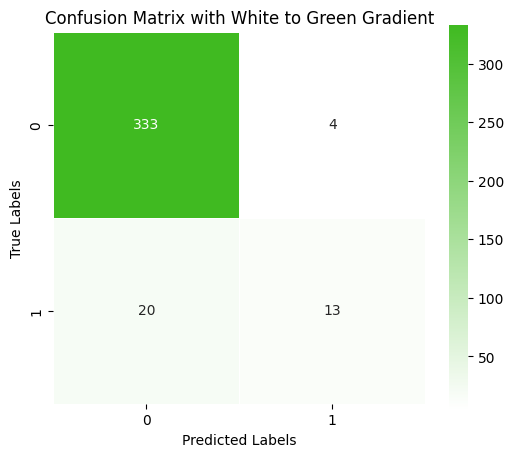

In [165]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Исходный зеленый цвет в HEX
hex_green_color = corp_col

# Преобразуем hex-код в tuple (R,G,B)
rgb_green_color = tuple(int(hex_green_color[i:i+2], 16)/255 for i in (1, 3, 5))  # конвертируем каждый байт из HEX в float

# Создаем градиент от белого (1,1,1) до нашего зеленого цвета
colors = [(1, 1, 1), rgb_green_color]

# Создаем линейную сегментированную цветовую карту
c_map = LinearSegmentedColormap.from_list("", colors)

# Строим матрицу ошибок с градиентом цветов
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap=c_map, linewidths=.5, square=True)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix with White to Green Gradient")
plt.show()

## Метрики качества

In [168]:
TP = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
TN = cm[0, 0]

# Ручной расчет метрик
precision_manual = TP / (TP + FP)
recall_manual = TP / (TP + FN)
specificity_manual = TN / (TN + FP)
f1_manual = 2 * ((precision_manual * recall_manual) / (precision_manual + recall_manual))
accuracy_manual = (TP + TN) / (TP + TN + FP + FN)

print("\nМетрики:")
print(f"Прецизионность (Precision): {precision_manual:.3f}")
print(f"Полнота (Recall): {recall_manual:.3f}")
print(f"Специфичность (Specificity): {specificity_manual:.3f}")
print(f"F1-Score: {f1_manual:.3f}")
print(f"Общая точность (Accuracy): {accuracy_manual:.3f}")


Метрики:
Прецизионность (Precision): 0.765
Полнота (Recall): 0.394
Специфичность (Specificity): 0.988
F1-Score: 0.520
Общая точность (Accuracy): 0.935


# Общие выводы

Наилучшие результаты для прогноза принадлежности значений к подмножеству v_lines был получен для К = 2. Для этого значения показатель доли верно классифицированных значений принадлежности к v_lines (1) среди всех тех кто был предсказан как принадлежащий к классу (1) составил 76.5% (Precision). Доля верно найденных примеров принадлежности к классу v_lines относительно реально принадлежащих составила 39.4% (Recall).

При тестировании на подклассе dino вместо v_lines была полученаа околонулевая точность, так как метод KNN основывал свои прогнозы лишь на геометрической близости точек и не учитывал никакие другие зависимости. Для более высокого качества прогнозирования принадлежности к одной из подгрупп (переменная dataset), нужно либо более сложные методы, либо нужно больше предсказательных переменых помимо только лишь двух координат X и Y.